In [1]:
# install the package
!pip install pytrends

  Stored in directory: C:\Users\Lin\AppData\Local\pip\Cache\wheels\64\ae\af\51d48fbbca0563036c6f80999b7ce3f097fa591fd165047baf
Successfully built pytrends


In [6]:
import pandas as pd
from pytrends.request import TrendReq

pytrend = TrendReq()
pytrend.build_payload(kw_list = ["Clean Beauty"])

In [19]:
# interest by region
df = pytrend.interest_by_region(resolution = "COUNTRY", inc_low_vol = False )
df.head(100)

,Clean Beauty
geoName,
Afghanistan,0
Albania,0
Algeria,0
American Samoa,0
Andorra,0
...,...
Guyana,0
Haiti,0
Heard & McDonald Islands,0


AttributeError: 'Rectangle' object has no property 'resolution'

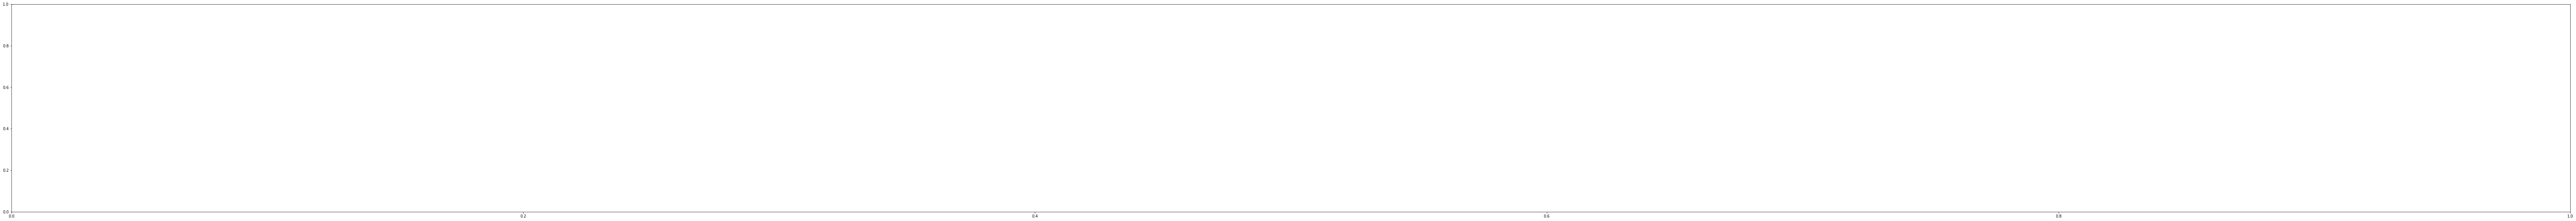

In [13]:
df.reset_index().plot(x = "geoName", 
                      y = "Clean Beauty", 
                      figsize = (120, 10), 
                      kind = "bar")